In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Problem 2: Demand Estimation

The sales of two companies, Company 1 and Company 2, in two regions,
Region 1 and Region 2, are provided here. The description of the only three columns
are:

    ● Sales_U → Sales in equivalent units (lbs)
    ● Sales_USD → Sales in $
    ● date → starting date for the week


● Construct time-series plots of sales and prices for Company 1 in Region 1 and 2. Repeat the exercise for Company 2. Describe the differences or similarities between Company 1 and 2 pricing policies.

In [2]:
r1_c1 = pd.read_csv("region1_company1.csv")
r2_c1 = pd.read_csv("region2_company1.csv")
r1_c2 = pd.read_csv("region1_company2.csv")
r2_c2 = pd.read_csv("region2_company2.csv")

In [3]:
r1_c1["Price_USD"] = r1_c1["Sales_USD"]/r1_c1["Sales_U"]
r2_c1["Price_USD"] = r2_c1["Sales_USD"]/r2_c1["Sales_U"]
r1_c2["Price_USD"] = r1_c2["Sales_USD"]/r1_c2["Sales_U"]
r2_c2["Price_USD"] = r2_c2["Sales_USD"]/r2_c2["Sales_U"]

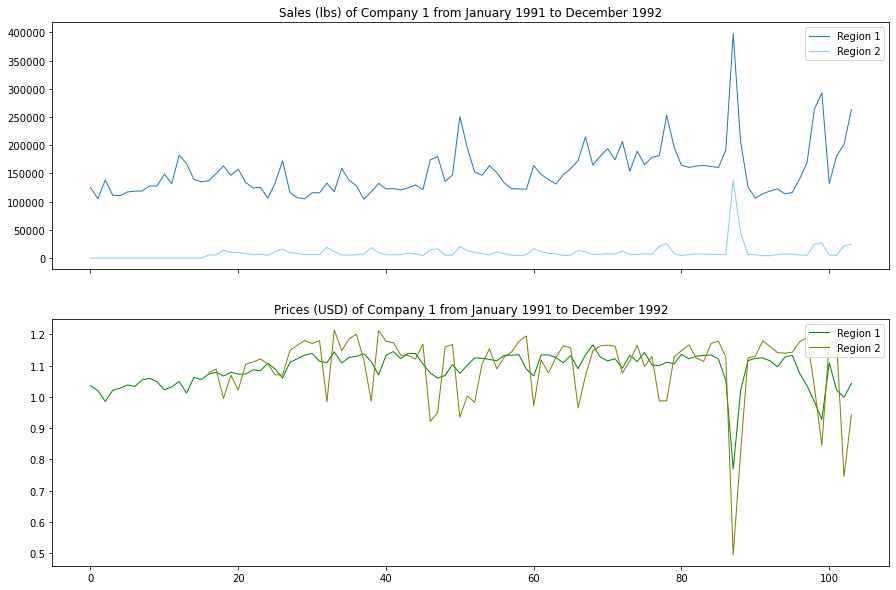

In [4]:
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True,figsize=(15,10))


#ax1.figure(figsize=(15,7))
ax1.plot(r1_c1["Sales_U"],label="Region 1",linewidth=1)
#plt.plot(reg1_comp1["Price_USD"],label="Prices R1" , color ='green',linewidth=1)
ax1.plot(r2_c1["Sales_U"],label="Region 2", linewidth=1,color = 'skyblue')
#plt.plot(reg2_comp1["Sales_USD"],label="Prices R2",linewidth=1 , color ='olive')
#ax1.xticks(ticks=[0,13,26,39,52,65,78,91,104],labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])
#ax1.title("Sales (lbs) and prices (USD) of Company 1 in Region 1 and 2  from January 1991 to December 1992")

ax1.set_title("Sales (lbs) of Company 1 from January 1991 to December 1992")
ax1.legend(loc="upper right")
#ax1.ylim([-50000, 800000])

#ax2.figure(figsize=(15,7))
#plt.plot(reg1_comp1["Sales_U"],label="Sales R1",linestyle='--',linewidth=1)
ax2.plot(r1_c1["Price_USD"],label="Region 1" , color ='green',linewidth=1)
#plt.plot(reg2_comp1["Sales_U"],label="Sales R2", linewidth=1, linestyle='--',color = 'skyblue')
ax2.plot(r2_c1["Price_USD"],label="Region 2",linewidth=1 , color ='olive')

#ax2.xticks(ticks=[0,13,26,39,52,65,78,91,104],labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])
#ax2.title("Sales (lbs) and prices (USD) of Company 1 in Region 1 and 2  from January 1991 to December 1992")

ax2.set_title("Prices (USD) of Company 1 from January 1991 to December 1992")
ax2.legend(loc="upper right")

plt.show()

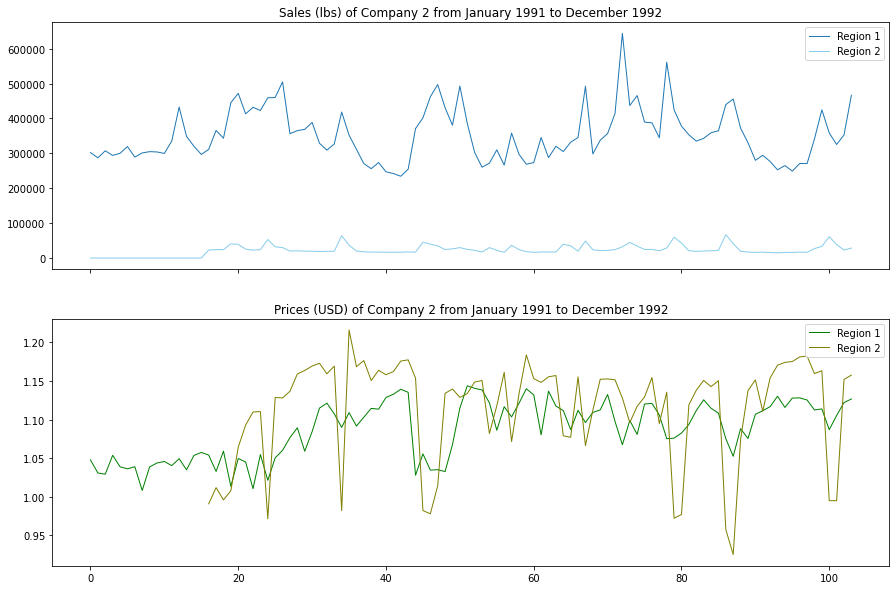

In [5]:
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True,figsize=(15,10))


#ax1.figure(figsize=(15,7))
ax1.plot(r1_c2["Sales_U"],label="Region 1",linewidth=1)
#plt.plot(reg1_comp1["Price_USD"],label="Prices R1" , color ='green',linewidth=1)
ax1.plot(r2_c2["Sales_U"],label="Region 2", linewidth=1,color = 'skyblue')
#plt.plot(reg2_comp1["Sales_USD"],label="Prices R2",linewidth=1 , color ='olive')
#ax1.xticks(ticks=[0,13,26,39,52,65,78,91,104],labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])
#ax1.title("Sales (lbs) and prices (USD) of Company 1 in Region 1 and 2  from January 1991 to December 1992")

ax1.set_title("Sales (lbs) of Company 2 from January 1991 to December 1992")
ax1.legend(loc="upper right")
#ax1.ylim([-50000, 800000])

#ax2.figure(figsize=(15,7))
#plt.plot(reg1_comp1["Sales_U"],label="Sales R1",linestyle='--',linewidth=1)
ax2.plot(r1_c2["Price_USD"],label="Region 1" , color ='green',linewidth=1)
#plt.plot(reg2_comp1["Sales_U"],label="Sales R2", linewidth=1, linestyle='--',color = 'skyblue')
ax2.plot(r2_c2["Price_USD"],label="Region 2",linewidth=1 , color ='olive')

#ax2.xticks(ticks=[0,13,26,39,52,65,78,91,104],labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])
#ax2.title("Sales (lbs) and prices (USD) of Company 1 in Region 1 and 2  from January 1991 to December 1992")

ax2.set_title("Prices (USD) of Company 2 from January 1991 to December 1992")
ax2.legend(loc="upper right")

plt.show()

● Construct scatter-plots of sales versus prices for Company 1 in Region 1 and Region 2 separately. Repeat the exercise for Company 2. Is there evidence for a negatively sloped demand-curve in the data? Eye-balling these plots, does demand appear more elastic in Region 1 or 2?

In [6]:
r1_c1.drop(columns="Date", inplace=True)
r1_c1.sort_values('Sales_U',ignore_index=True ,inplace =True)

r2_c1.drop(columns="Date", inplace=True)
r2_c1.sort_values('Sales_U',ignore_index=True ,inplace =True)

r1_c2.drop(columns="Date", inplace=True)
r1_c2.sort_values('Sales_U',ignore_index=True ,inplace =True)

r2_c2.drop(columns="Date", inplace=True)
r2_c2.sort_values('Sales_U',ignore_index=True ,inplace =True)

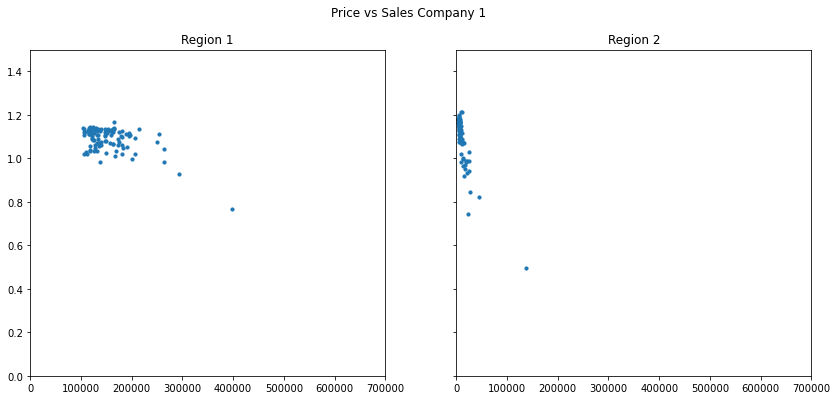

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6),sharex=True ,sharey=True,)
fig.suptitle("Price vs Sales Company 1")

ax1.scatter(r1_c1["Sales_U"],r1_c1["Price_USD"],s=10)
ax1.set_xlim(0,700000)
ax1.set_ylim(0,1.5)
ax1.set_title("Region 1")

ax2.scatter(r2_c1["Sales_U"],r2_c1["Price_USD"],s=10)
ax2.set_title("Region 2")

plt.show()

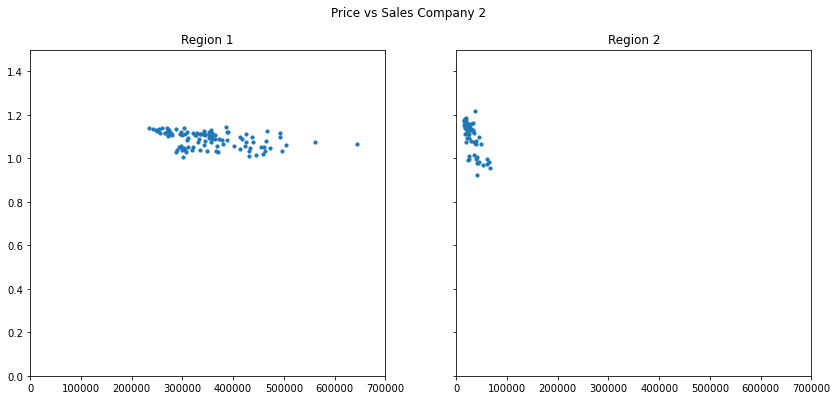

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6),sharex=True ,sharey=True,)
fig.suptitle("Price vs Sales Company 2")

ax1.scatter(r1_c2["Sales_U"],r1_c2["Price_USD"],s=10)
ax1.set_xlim(0,700000)
ax1.set_ylim(0,1.5)
ax1.set_title("Region 1")

ax2.scatter(r2_c2["Sales_U"],r2_c2["Price_USD"],s=10)
ax2.set_title("Region 2")

plt.show()

In both companies the curve of the demand in Region 1 tends to be horizontal, and in Region 2 tends to be vertical. This  behavior suggests that the demand is more elastic in Region 1 than in Region 2.

● Estimate the price elasticity of demand for Company 1 and 2 at Region 1 and 2 (four different demand models). Is the demand elasticity higher (in absolute magnitude) in Region 1 or 2?

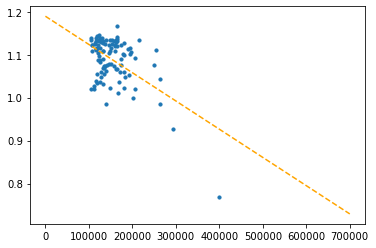

In [17]:
# Add scatterplot
plt.scatter(r1_c1["Sales_U"],r1_c1["Price_USD"],s=10)

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
m, b = np.polyfit(r1_c1["Sales_U"], r1_c1["Price_USD"], deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 700000, num=100)

# Plot regression line
plt.plot(xseq, m * xseq +b, color="orange", linestyle="--")

plt.show()

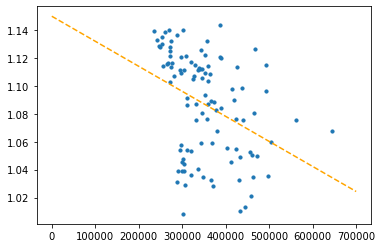

In [19]:
# Add scatterplot
plt.scatter(r1_c2["Sales_U"],r1_c2["Price_USD"],s=10)

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
m, b = np.polyfit(r1_c2["Sales_U"], r1_c2["Price_USD"], deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 700000, num=100)

# Plot regression line
plt.plot(xseq, m * xseq +b, color="orange", linestyle="--")

plt.show()

LinAlgError: SVD did not converge in Linear Least Squares

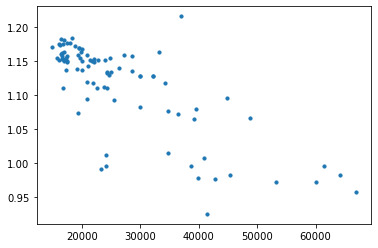

In [20]:
plt.scatter(r2_c2["Sales_U"],r2_c2["Price_USD"],s=10)

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
m, b = np.polyfit(r2_c2["Sales_U"], r2_c2["Price_USD"], deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 700000, num=100)

# Plot regression line
plt.plot(xseq, m * xseq +b, color="orange", linestyle="--")

plt.show()